In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [69]:
random_velocities = np.random.normal(loc=0.0, scale=10000, size=100000)

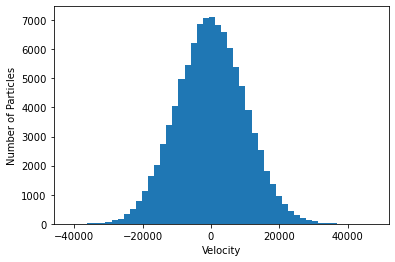

In [70]:
plt.hist(random_velocities, 50)
plt.xlabel('Velocity')
plt.ylabel('Number of Particles')
plt.show()

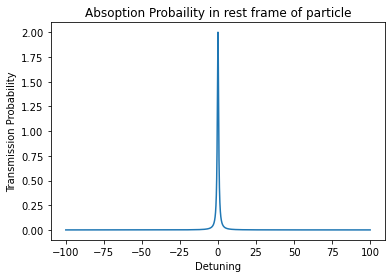

In [71]:
def Lorentzian(x, mu, lw):
    return(0.5*lw/((0.5*lw)**2+(x-mu)**2))

def Doppler(f0, v):
    return(f0*(1+v/3e8))

mu = 0
sigma = 1
x = np.linspace(mu - 100, mu + 100, 1000000)
plt.plot(x, Lorentzian(x, mu, sigma))
plt.xlabel('Detuning')
plt.ylabel('Transmission Probability')
# plt.xlim(mu - 100000, mu + 100000,)
plt.title('Absoption Probaility in rest frame of particle')
plt.show()


In [72]:
big_ave = np.zeros(1000000)
l_sigma=2*sigma # my laser sigma!

# for v in random_velocities:
#     f_towards =  np.random.normal(Doppler(mu, v), l_sigma) #draw random frequency for moving towards
#     big_ave += Lorentzian(x, f_towards, sigma)

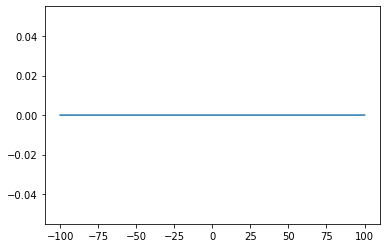

In [73]:
# # plot histogram of absorbed frequencies in lab frame
# plt.plot(x, Lorentzian(x, mu, sigma))
plt.plot(x, big_ave/len(random_velocities))


In [74]:
df_frequencies=[]
for v in random_velocities:
    f_towards =  np.random.normal(Doppler(mu, v), l_sigma)
    f_away =  np.random.normal(Doppler(mu, -v), l_sigma)
    prob = Lorentzian(f_towards+f_away, mu, sigma)
    rand01 = np.random.uniform(low=0.0, high=1.0)
    if(rand01<prob):
        df_frequencies.append(Doppler(f_towards, -v))
        df_frequencies.append(Doppler(f_away, +v))
        continue
    f_towards2 =  np.random.normal(Doppler(mu, v), l_sigma)
    prob = Lorentzian(f_towards+f_towards2, mu, sigma)
    if(rand01<prob):
        df_frequencies.append(Doppler(f_towards, -v))
        df_frequencies.append(Doppler(f_towards2, -v))
        continue
    f_away2 =  np.random.normal(Doppler(mu, -v), l_sigma)
    prob = Lorentzian(f_away+f_away2, mu, sigma)
    if(rand01<prob):
        df_frequencies.append(Doppler(f_away, v))
        df_frequencies.append(Doppler(f_away2, v))

In [75]:
df2_frequencies=[]
for v in random_velocities:
    f_towards =  np.random.normal(Doppler(mu, v), l_sigma)
    prob = Lorentzian(f_towards, mu, sigma)
    if(np.random.uniform(low=0.0, high=1.0)<prob):
        df2_frequencies.append(Doppler(f_towards, - v))
        continue
    f_away =  np.random.normal(Doppler(mu, -v), l_sigma)
    prob = Lorentzian(f_away, mu, sigma)
    if(np.random.uniform(low=0.0, high=1.0)<prob):
        df2_frequencies.append(Doppler(f_away, v))

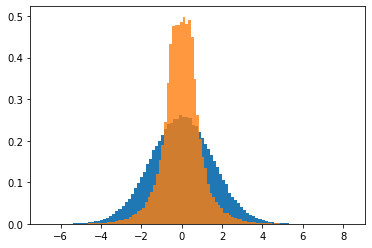

In [76]:
plt.hist(df_frequencies, density=True, bins=100)
plt.hist(df2_frequencies, density=True, bins=100, alpha=0.8)
plt.show()
# plt.xlim(-10, 10)